#**Linear Regression**

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.[1] This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.[2]

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.[3] Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications.[4] This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.

## **1-ONE Variable**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
x = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example

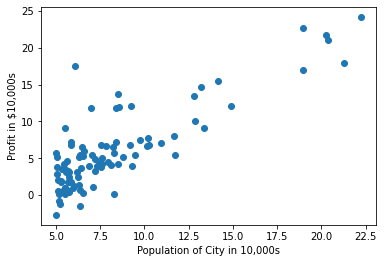

In [56]:
data.head() # view first few rows of the data
plt.scatter(x, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


In [57]:
X = [x,np.ones(m,dtype=int)]
theta = np.zeros([2,1])
X

[0      6.1101
 1      5.5277
 2      8.5186
 3      7.0032
 4      5.8598
        ...   
 92     5.8707
 93     5.3054
 94     8.2934
 95    13.3940
 96     5.4369
 Name: 0, Length: 97, dtype: float64,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [97]:
def computeCost(X, y, theta):
  for i in range(m):
    error = np.dot(np.transpose(X),theta)-y[i]
    J=sum(error[i]**2) / (2*m)
  return J
J = computeCost(X, y, theta)
J

0.001962632487113402

In [59]:
iterations = 50
alpha = 0.01

# Finding the optimal parameters using Gradient Descent
def gradientDescent(X, y, theta, alpha, iterations):
    for j in range(iterations):
      for i in range(m):
        error = np.dot(np.transpose(X),theta)-y[i]
        J=sum(error[i]**2) / (2*m)
  
      theta=theta-alpha*(2/m) * np.dot(x,error)
      print(f"Iteration: {j} slope: {theta[0]} and intercept: {theta[1]} and the cost is: {J}"")                                                                                        }")

    return theta

A=gradientDescent(X, y, theta, alpha, iterations)
A

Iteration: 0 slope: [0.10070009] and intercept: [0.10070009] and the cost is: 0.001962632487113402)                                                                                        }
Iteration: 1 slope: [0.02101864] and intercept: [0.02101864] and the cost is: 5.0005130687740104e-06)                                                                                        }
Iteration: 2 slope: [0.08406857] and intercept: [0.08406857] and the cost is: 0.001196329819792385)                                                                                        }
Iteration: 3 slope: [0.03417875] and intercept: [0.03417875] and the cost is: 2.9701958806613463e-05)                                                                                        }
Iteration: 4 slope: [0.07365531] and intercept: [0.07365531] and the cost is: 0.0008126010023322157)                                                                                        }
Iteration: 5 slope: [0.0424185] and intercept: [0.

array([[0.05621653],
       [0.05621653]])

## **2-MULTIPLE Variable**

In [60]:
import numpy as np
import pandas as pd

In [61]:
data = pd.read_csv('ex1data2.txt',header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [62]:
x = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
m

47

In [63]:
# Feature Normalization
# By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by 
#orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
# Our task here is to:
# Subtract the mean value of each feature from the dataset.
# After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”
x = (x - np.mean(x))/np.std(x)
x

,0,1
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205
5,-0.019945,1.102205
6,-0.593589,-0.226093
7,-0.729686,-0.226093
8,-0.789467,-0.226093
9,-0.644466,-0.226093


In [70]:
# Adding the intercept term and initializing parameters
#numpy.hstack. Stack arrays in sequence horizontally (column wise).
X = np.array((x,np.ones(m))
theta = np.zeros((3,1))                  
X

SyntaxError: ignored

In [71]:
# Computing the cost
def computeCost(X, y, theta):
  for i in range(m):
    error = np.dot(X,theta)-y[i]
    J=sum(error[i]**2) / (2*m)
  return error
J = computeCost(X, y, theta)
J

ValueError: ignored

In [ ]:
iterations = 50
alpha = 0.01

# Finding the optimal parameters using Gradient Descent
def gradientDescent(X, y, theta, alpha, iterations):
    for j in range(iterations):
      for i in range(m):
        error = np.dot(X,theta)-y[i]
        J=sum(error[i]**2) / (2*m)
  
      theta=theta-alpha*(2/m) * np.dot(x,error)
      print(f"Iteration: {j} slope: {theta[0]} and intercept: {theta[1]} and the cost is: {J}"")                                                                                        }")

    return theta

A=gradientDescent(X, y, theta, alpha, iterations)
A

ValueError: ignored

## **3-Lasso Regression**
 
It is also called as l1 regularization. Similar to ridge regression, lasso regression also works in a similar fashion the only difference is of the penalty term. In ridge, we multiply it by slope and take the square whereas in lasso we just multiply the alpha with absolute of slope. 

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
x = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example

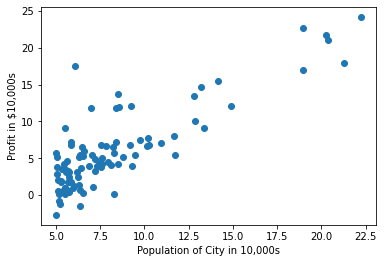

In [76]:
data.head() # view first few rows of the data
plt.scatter(x, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [77]:
X = [x,np.ones(m,dtype=int)]
theta = np.zeros([2,1])
X

[0      6.1101
 1      5.5277
 2      8.5186
 3      7.0032
 4      5.8598
        ...   
 92     5.8707
 93     5.3054
 94     8.2934
 95    13.3940
 96     5.4369
 Name: 0, Length: 97, dtype: float64,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [88]:
def computeCost(X, y, theta,lam=10):
  for i in range(m):
    error = np.dot(np.transpose(X),theta)-y[i]
    J=sum(error[i]**2) / (2*m)+lam*np.linalg.norm(theta)
  return J
J = computeCost(X, y, theta)
J

0.001962632487113402

In [89]:
iterations = 50
alpha = 0.01

# Finding the optimal parameters using Gradient Descent
def gradientDescent(X, y, theta, alpha, iterations):
    for j in range(iterations):
      for i in range(m):
        error = np.dot(np.transpose(X),theta)-y[i]
        J=sum(error[i]**2) / (2*m)
  
      theta=theta-alpha*(2/m) * np.dot(x,error)
      print(f"Iteration: {j} slope: {theta[0]} and intercept: {theta[1]} and the cost is: {J}"")                                                                                        }")

    return theta

A=gradientDescent(X, y, theta, alpha, iterations)
A

Iteration: 0 slope: [0.10070009] and intercept: [0.10070009] and the cost is: 0.001962632487113402)                                                                                        }
Iteration: 1 slope: [0.02101864] and intercept: [0.02101864] and the cost is: 5.0005130687740104e-06)                                                                                        }
Iteration: 2 slope: [0.08406857] and intercept: [0.08406857] and the cost is: 0.001196329819792385)                                                                                        }
Iteration: 3 slope: [0.03417875] and intercept: [0.03417875] and the cost is: 2.9701958806613463e-05)                                                                                        }
Iteration: 4 slope: [0.07365531] and intercept: [0.07365531] and the cost is: 0.0008126010023322157)                                                                                        }
Iteration: 5 slope: [0.0424185] and intercept: [0.

array([[0.05621653],
       [0.05621653]])

##**4-Ridge Regression**

It is also called an L2 regularization that is used to get rid of overfitting. The goal while building a machine learning model is to develop a model that can generalize patterns well in training as well as in testing. 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
x = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example

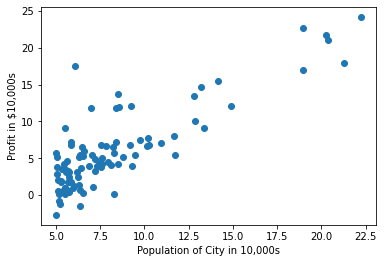

In [92]:
data.head() # view first few rows of the data
plt.scatter(x, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [93]:
X = [x,np.ones(m,dtype=int)]
theta = np.zeros([2,1])
X

[0      6.1101
 1      5.5277
 2      8.5186
 3      7.0032
 4      5.8598
        ...   
 92     5.8707
 93     5.3054
 94     8.2934
 95    13.3940
 96     5.4369
 Name: 0, Length: 97, dtype: float64,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [95]:
def computeCost(X, y, theta,lam=10):
  for i in range(m):
    error = np.dot(np.transpose(X),theta)-y[i]
    J=sum(error[i]**2) / (2*m)+lam*(np.linalg.norm(theta)**2)
  return J
J = computeCost(X, y, theta)
J

0.001962632487113402

In [96]:
iterations = 50
alpha = 0.01

# Finding the optimal parameters using Gradient Descent
def gradientDescent(X, y, theta, alpha, iterations):
    for j in range(iterations):
      for i in range(m):
        error = np.dot(np.transpose(X),theta)-y[i]
        J=sum(error[i]**2) / (2*m)
  
      theta=theta-alpha*(2/m) * np.dot(x,error)
      print(f"Iteration: {j} slope: {theta[0]} and intercept: {theta[1]} and the cost is: {J}"")                                                                                        }")

    return theta

A=gradientDescent(X, y, theta, alpha, iterations)
A

Iteration: 0 slope: [0.10070009] and intercept: [0.10070009] and the cost is: 0.001962632487113402)                                                                                        }
Iteration: 1 slope: [0.02101864] and intercept: [0.02101864] and the cost is: 5.0005130687740104e-06)                                                                                        }
Iteration: 2 slope: [0.08406857] and intercept: [0.08406857] and the cost is: 0.001196329819792385)                                                                                        }
Iteration: 3 slope: [0.03417875] and intercept: [0.03417875] and the cost is: 2.9701958806613463e-05)                                                                                        }
Iteration: 4 slope: [0.07365531] and intercept: [0.07365531] and the cost is: 0.0008126010023322157)                                                                                        }
Iteration: 5 slope: [0.0424185] and intercept: [0.

array([[0.05621653],
       [0.05621653]])